# EDA - Dataset Nettoyé pour Classification

## Contexte
Ce notebook présente une analyse exploratoire du dataset **nettoyé** créé à partir du dataset original de Kaggle.

Le dataset original contenait 246,945 lignes et 773 maladies. Après nettoyage, nous avons :
- Supprimé les doublons (23.20% du dataset original)
- Filtré pour ne garder que **6 maladies** d'intérêt
- Retiré les colonnes de symptômes inutilisées

## Objectifs
1. Comprendre la distribution des 6 maladies
2. Analyser les symptômes et leur prévalence
3. Identifier les symptômes discriminants pour chaque maladie
4. Étudier les corrélations entre symptômes
5. Analyser la co-occurrence de symptômes
6. Préparer les insights pour la modélisation Deep Learning

## Méthodologie
- Approche pédagogique et simple
- Focus sur les visualisations claires
- Identification des patterns pour le Deep Learning

## Import des Bibliothèques

In [1]:
# Imports standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from itertools import combinations

# Configuration matplotlib/seaborn
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuration pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


## Définition des Constantes

**Rationale:** Centraliser les paramètres pour faciliter les modifications futures

In [2]:
# Chemins des fichiers
DATA_PATH = Path('../data/output/cleaned.csv')
OUTPUT_DIR = Path('../data/output')

# Paramètres d'analyse
TOP_N_SYMPTOMS = 30  # Nombre de symptômes à afficher dans les graphiques
CORRELATION_THRESHOLD = 0.7  # Seuil pour identifier les corrélations fortes
TOP_COOCCURRENCE = 20  # Nombre de paires de symptômes co-occurrents à afficher

# Maladies dans le dataset
DISEASES = [
    'anxiety',
    'cystitis',
    'herniated disk',
    'panic disorder',
    'pneumonia',
    'spondylolisthesis'
]

print(f"Constantes définies")
print(f"  - Fichier source: {DATA_PATH}")
print(f"  - Maladies cibles: {len(DISEASES)}")

Constantes définies
  - Fichier source: ../data/output/cleaned.csv
  - Maladies cibles: 6


## Chargement du Dataset Nettoyé

**Objectif:** Charger le dataset nettoyé et vérifier qu'il a été correctement créé

In [3]:
# Charger le dataset nettoyé
print(f"Chargement du dataset depuis: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)

print(f"\nDataset chargé avec succès")
print(f"  - Lignes: {df.shape[0]:,}")
print(f"  - Colonnes: {df.shape[1]:,}")
print(f"  - Mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Vérifier qu'il n'y a pas de doublons
duplicates = df.duplicated().sum()
print(f"\nVérification qualité:")
print(f"  - Doublons: {duplicates} (attendu: 0)")
print(f"  - Maladies uniques: {df['diseases'].nunique()} (attendu: {len(DISEASES)})")

Chargement du dataset depuis: ../data/output/cleaned.csv

Dataset chargé avec succès
  - Lignes: 5,781
  - Colonnes: 50
  - Mémoire: 2.49 MB

Vérification qualité:
  - Doublons: 0 (attendu: 0)
  - Maladies uniques: 6 (attendu: 6)


## Aperçu Général du Dataset

**Thinking:** Commençons par explorer la structure générale des données

In [4]:
# Afficher les premières lignes
print("Aperçu des premières lignes du dataset:")
display(df.head(10))

Aperçu des premières lignes du dataset:


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,irregular heartbeat,breathing fast,sore throat,cough,nasal congestion,retention of urine,leg pain,hip pain,suprapubic pain,sharp abdominal pain,vomiting,headache,painful urination,involuntary urination,frequent urination,lower abdominal pain,blood in urine,arm pain,back pain,neck pain,low back pain,pelvic pain,wheezing,problems with movement,weakness,increased heart rate,loss of sensation,paresthesia,side pain,fever,shoulder pain,leg cramps or spasms,difficulty breathing,chills,coryza,fears and phobias,symptoms of bladder,arm weakness,leg weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,panic disorder,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,panic disorder,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,panic disorder,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,panic disorder,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,panic disorder,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Informations générales
print("Informations sur le dataset:")
df.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   diseases                          5781 non-null   object
 1   anxiety and nervousness           5781 non-null   int64 
 2   depression                        5781 non-null   int64 
 3   shortness of breath               5781 non-null   int64 
 4   depressive or psychotic symptoms  5781 non-null   int64 
 5   sharp chest pain                  5781 non-null   int64 
 6   dizziness                         5781 non-null   int64 
 7   insomnia                          5781 non-null   int64 
 8   abnormal involuntary movements    5781 non-null   int64 
 9   chest tightness                   5781 non-null   int64 
 10  palpitations                      5781 non-null   int64 
 11  irregular heartbeat               5781 non-null   int

In [6]:
# Liste des colonnes (symptômes)
symptom_cols = [col for col in df.columns if col != 'diseases']

print(f"Structure du dataset:")
print(f"  - Colonne cible: 'diseases'")
print(f"  - Nombre de symptômes: {len(symptom_cols)}")
print(f"\nPremiers 10 symptômes:")
for i, symptom in enumerate(symptom_cols[:10], 1):
    print(f"  {i}. {symptom}")
if len(symptom_cols) > 10:
    print(f"  ... et {len(symptom_cols) - 10} autres symptômes")

Structure du dataset:
  - Colonne cible: 'diseases'
  - Nombre de symptômes: 49

Premiers 10 symptômes:
  1. anxiety and nervousness
  2. depression
  3. shortness of breath
  4. depressive or psychotic symptoms
  5. sharp chest pain
  6. dizziness
  7. insomnia
  8. abnormal involuntary movements
  9. chest tightness
  10. palpitations
  ... et 39 autres symptômes


## Distribution des Maladies

**Thinking:** Analysons la répartition des 6 maladies pour comprendre si le dataset est équilibré ou déséquilibré. Cela aura un impact sur les stratégies d'entraînement Deep Learning (class weights, focal loss).

In [7]:
# Distribution des maladies
disease_counts = df['diseases'].value_counts().sort_index()

print("Distribution des maladies:")
print("=" * 60)
for disease, count in disease_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{disease:25s}: {count:4d} ({percentage:5.2f}%)")

print("=" * 60)
print(f"Total: {len(df):,} lignes")

# Statistiques d'équilibre
max_count = disease_counts.max()
min_count = disease_counts.min()
ratio = max_count / min_count

print(f"\nAnalyse d'équilibre:")
print(f"  - Maladie la plus fréquente: {disease_counts.idxmax()} ({max_count} cas)")
print(f"  - Maladie la moins fréquente: {disease_counts.idxmin()} ({min_count} cas)")
print(f"  - Ratio max/min: {ratio:.2f}")

if ratio < 1.5:
    print(f"  - Verdict: Dataset bien équilibré")
elif ratio < 3:
    print(f"  - Verdict: Légèrement déséquilibré")
else:
    print(f"  - Verdict: Fortement déséquilibré")

Distribution des maladies:
anxiety                  : 1198 (20.72%)
cystitis                 : 1219 (21.09%)
herniated disk           :  828 (14.32%)
panic disorder           :  810 (14.01%)
pneumonia                : 1212 (20.97%)
spondylolisthesis        :  514 ( 8.89%)
Total: 5,781 lignes

Analyse d'équilibre:
  - Maladie la plus fréquente: cystitis (1219 cas)
  - Maladie la moins fréquente: spondylolisthesis (514 cas)
  - Ratio max/min: 2.37
  - Verdict: Légèrement déséquilibré


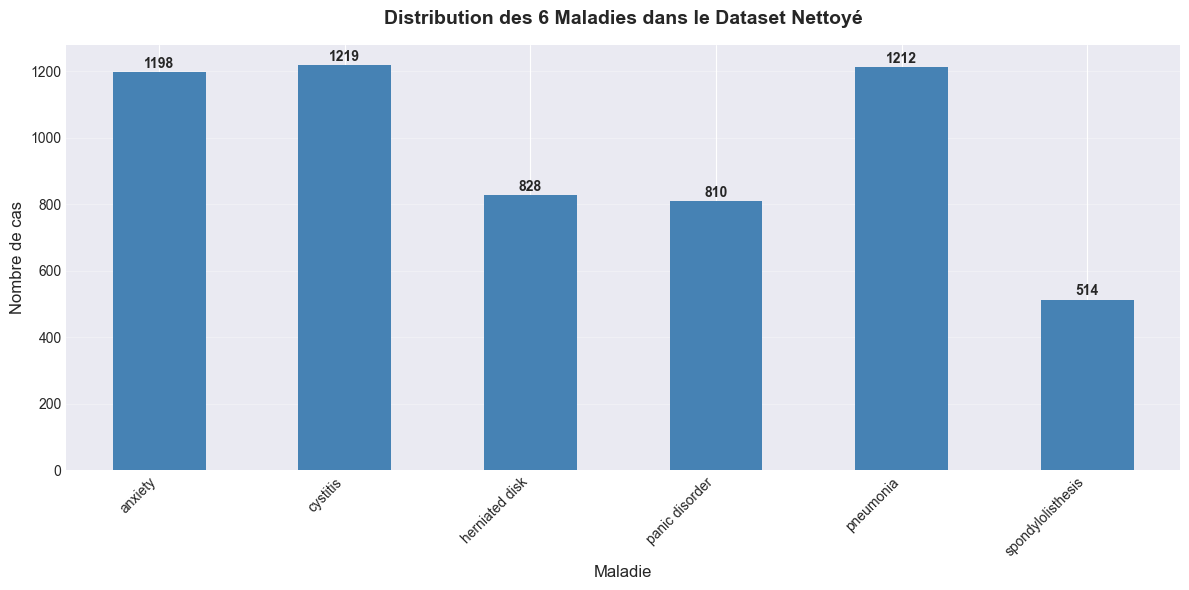

In [8]:
# Visualisation de la distribution
fig, ax = plt.subplots(figsize=(12, 6))

disease_counts.plot(kind='bar', color='steelblue', ax=ax)

ax.set_title('Distribution des 6 Maladies dans le Dataset Nettoyé',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Maladie', fontsize=12)
ax.set_ylabel('Nombre de cas', fontsize=12)
ax.set_xticklabels(disease_counts.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(disease_counts.values):
    ax.text(i, v + max(disease_counts.values)*0.01, str(v),
            ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Analyse des Symptômes

**Objectif:** Comprendre quels symptômes sont les plus fréquents dans le dataset

In [9]:
# Calculer la prévalence de chaque symptôme
symptom_prevalence = df[symptom_cols].sum().sort_values(ascending=False)

print(f"Analyse de prévalence des symptômes:")
print(f"  - Total symptômes: {len(symptom_cols)}")
print(f"  - Symptôme le plus fréquent: '{symptom_prevalence.index[0]}' ({symptom_prevalence.iloc[0]:,} occurrences)")
print(f"  - Symptôme le moins fréquent: '{symptom_prevalence.index[-1]}' ({symptom_prevalence.iloc[-1]:,} occurrences)")

print(f"\nTop {TOP_N_SYMPTOMS} symptômes les plus fréquents:")
print("=" * 60)
for i, (symptom, count) in enumerate(symptom_prevalence.head(TOP_N_SYMPTOMS).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {symptom:30s}: {count:4d} ({percentage:5.1f}%)")

Analyse de prévalence des symptômes:
  - Total symptômes: 49
  - Symptôme le plus fréquent: 'shortness of breath' (1,593 occurrences)
  - Symptôme le moins fréquent: 'problems with movement' (254 occurrences)

Top 30 symptômes les plus fréquents:
 1. shortness of breath           : 1593 ( 27.6%)
 2. back pain                     : 1283 ( 22.2%)
 3. sharp chest pain              : 1243 ( 21.5%)
 4. depressive or psychotic symptoms: 1140 ( 19.7%)
 5. insomnia                      : 1035 ( 17.9%)
 6. abnormal involuntary movements: 1027 ( 17.8%)
 7. depression                    : 1012 ( 17.5%)
 8. irregular heartbeat           : 1007 ( 17.4%)
 9. palpitations                  : 1001 ( 17.3%)
10. anxiety and nervousness       :  996 ( 17.2%)
11. hip pain                      :  723 ( 12.5%)
12. low back pain                 :  702 ( 12.1%)
13. paresthesia                   :  686 ( 11.9%)
14. neck pain                     :  685 ( 11.8%)
15. leg pain                      :  673 ( 11.6%)
1

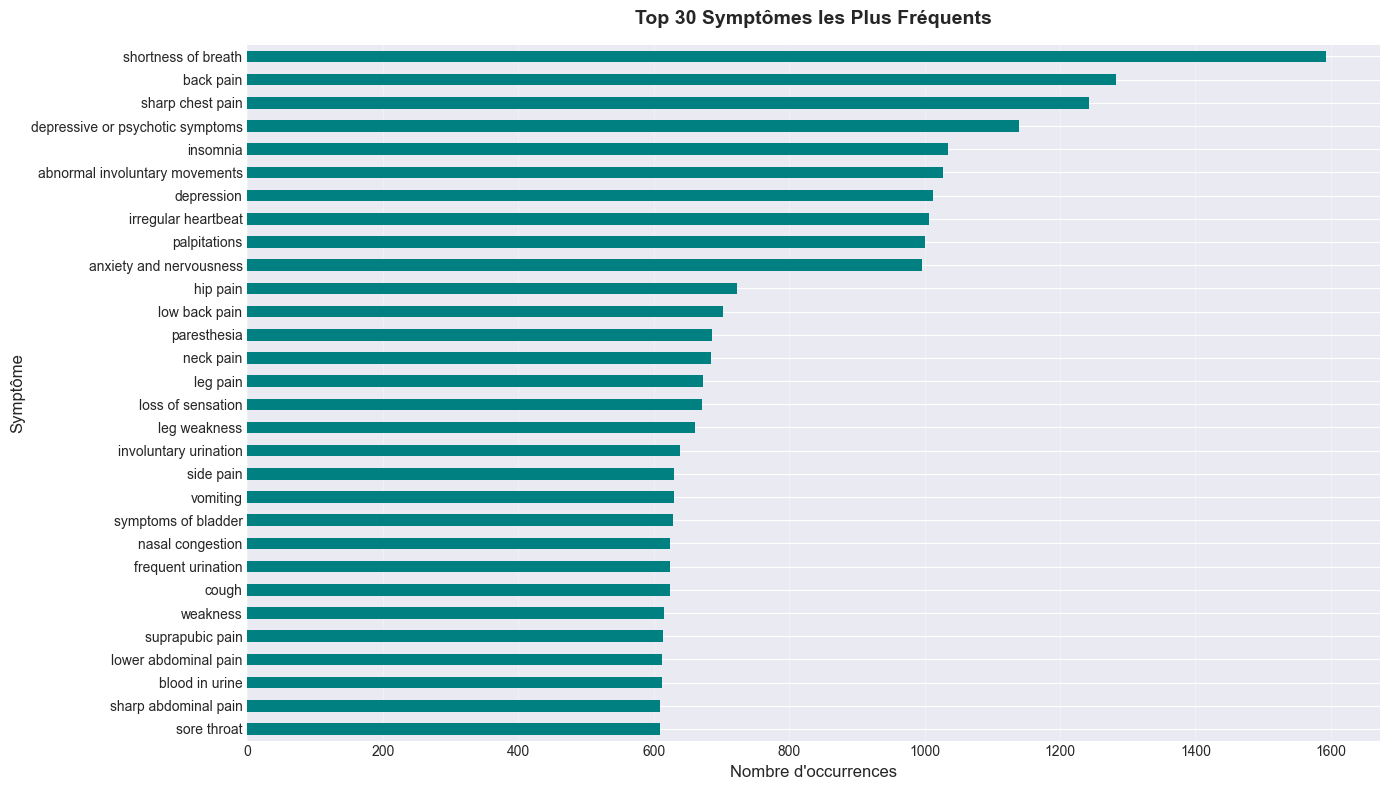

In [10]:
# Visualisation des symptômes les plus fréquents
fig, ax = plt.subplots(figsize=(14, 8))

top_symptoms = symptom_prevalence.head(TOP_N_SYMPTOMS)
top_symptoms.plot(kind='barh', color='teal', ax=ax)

ax.set_title(f'Top {TOP_N_SYMPTOMS} Symptômes les Plus Fréquents',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Nombre d\'occurrences', fontsize=12)
ax.set_ylabel('Symptôme', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Inverser l'ordre pour avoir le plus fréquent en haut
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [11]:
# Analyser le nombre de symptômes par patient (ligne)
symptoms_per_patient = df[symptom_cols].sum(axis=1)

print("Distribution du nombre de symptômes par patient:")
print(f"  - Minimum: {symptoms_per_patient.min()}")
print(f"  - Maximum: {symptoms_per_patient.max()}")
print(f"  - Moyenne: {symptoms_per_patient.mean():.2f}")
print(f"  - Médiane: {symptoms_per_patient.median():.0f}")
print(f"  - Écart-type: {symptoms_per_patient.std():.2f}")

Distribution du nombre de symptômes par patient:
  - Minimum: 1
  - Maximum: 11
  - Moyenne: 5.86
  - Médiane: 6
  - Écart-type: 1.68


## Matrice de Corrélation entre Symptômes

**Thinking:** La corrélation entre symptômes est importante pour comprendre :
- Quels symptômes apparaissent ensemble
- Si certains symptômes sont redondants
- Identifier les groupes de symptômes liés

**Note:** Une forte corrélation (>0.7) peut indiquer que certains symptômes fournissent une information similaire.

In [12]:
# Calculer la matrice de corrélation
correlation_matrix = df[symptom_cols].corr()

print(f"Matrice de corrélation calculée")
print(f"  - Dimensions: {correlation_matrix.shape[0]} × {correlation_matrix.shape[1]}")

Matrice de corrélation calculée
  - Dimensions: 49 × 49


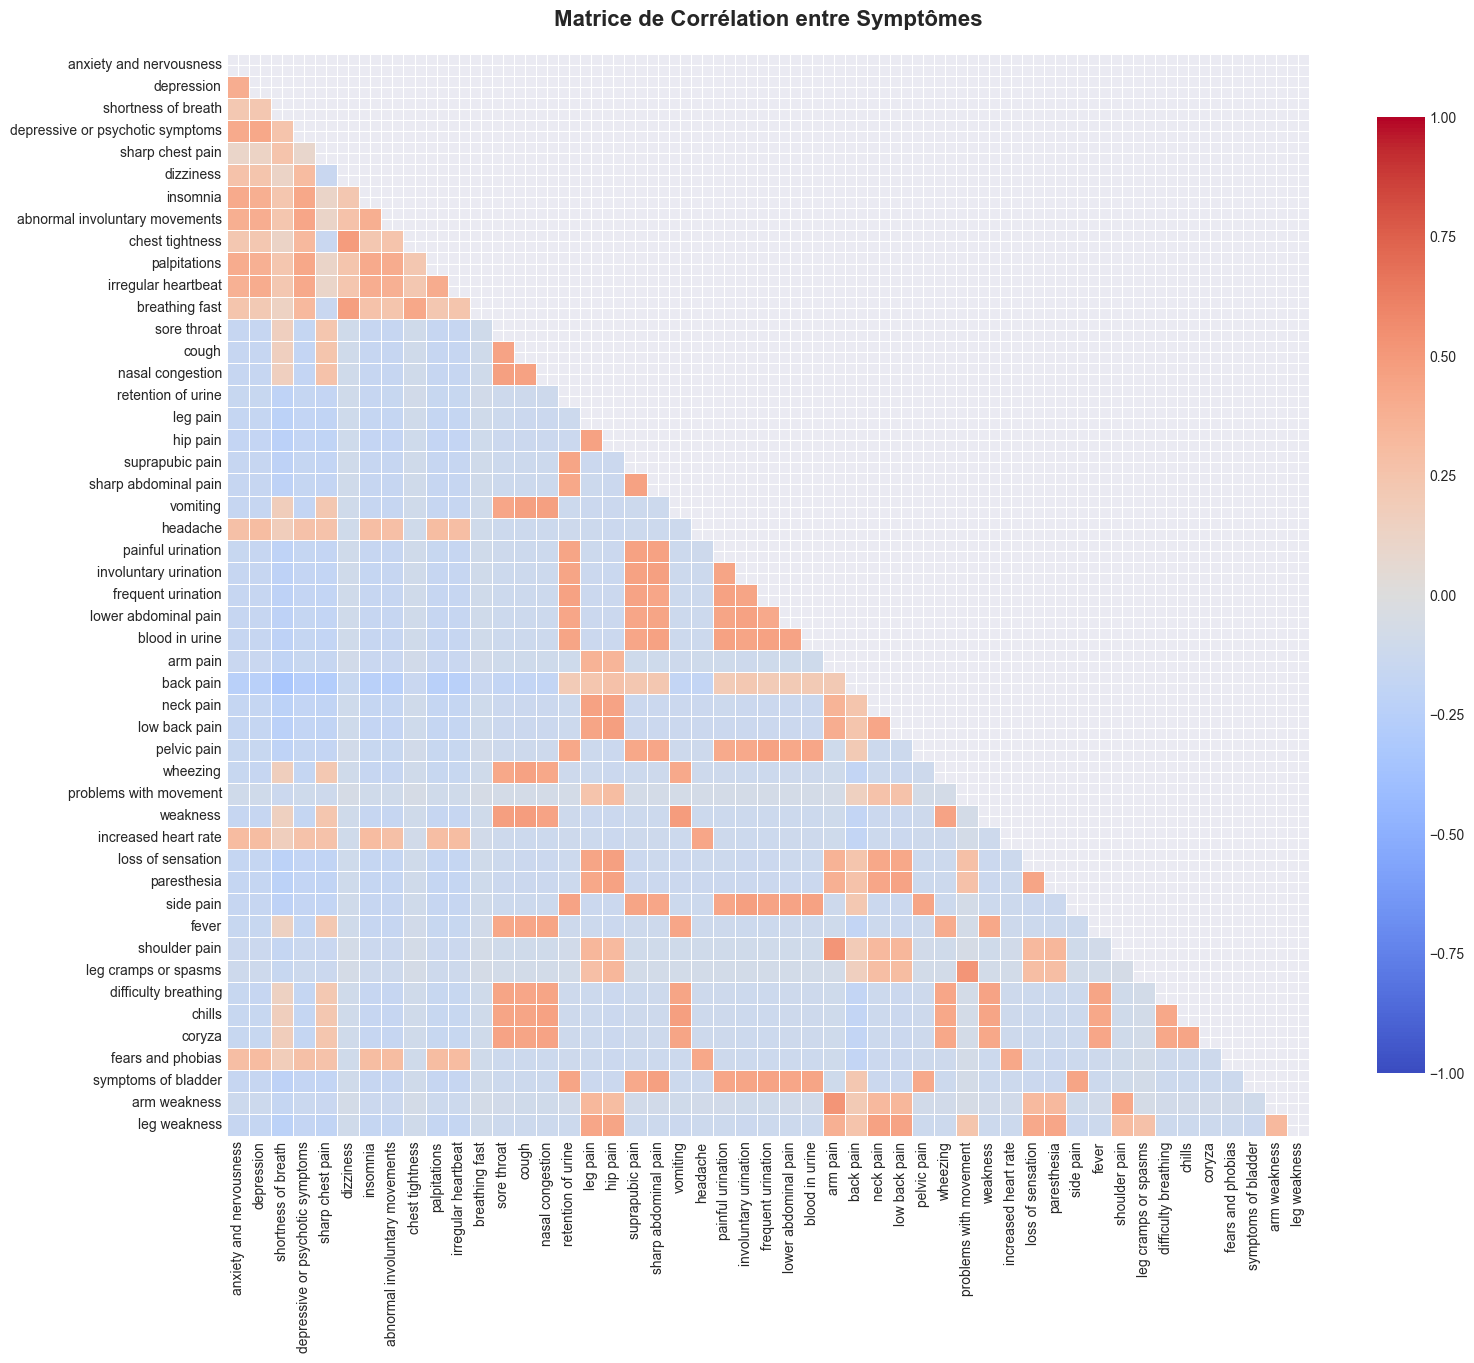

In [13]:
# Visualisation de la matrice de corrélation (heatmap)
fig, ax = plt.subplots(figsize=(16, 14))

# Créer un mask pour le triangle supérieur (éviter la redondance)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            mask=mask,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            ax=ax,
            vmin=-1, vmax=1)

ax.set_title('Matrice de Corrélation entre Symptômes',
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [14]:
# Identifier les paires de symptômes fortement corrélés
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= CORRELATION_THRESHOLD:
            strong_correlations.append({
                'symptom_1': correlation_matrix.columns[i],
                'symptom_2': correlation_matrix.columns[j],
                'correlation': corr_value
            })

# Trier par corrélation absolue décroissante
strong_correlations_df = pd.DataFrame(strong_correlations)
if len(strong_correlations_df) > 0:
    strong_correlations_df['abs_correlation'] = strong_correlations_df['correlation'].abs()
    strong_correlations_df = strong_correlations_df.sort_values('abs_correlation', ascending=False)

print(f"Corrélations fortes identifiées (seuil: {CORRELATION_THRESHOLD})")
print(f"  - Nombre de paires: {len(strong_correlations_df)}")

if len(strong_correlations_df) > 0:
    print(f"\nTop 10 corrélations les plus fortes:")
    print("=" * 80)
    for idx, row in strong_correlations_df.head(10).iterrows():
        print(f"{row['symptom_1']:25s} <-> {row['symptom_2']:25s}: {row['correlation']:6.3f}")
else:
    print("\nAucune corrélation forte détectée (bon signe pour la diversité des features)")

Corrélations fortes identifiées (seuil: 0.7)
  - Nombre de paires: 0

Aucune corrélation forte détectée (bon signe pour la diversité des features)


## Analyse des Symptômes par Maladie

**Thinking:** Cette section est cruciale pour comprendre quels symptômes caractérisent chaque maladie. Cela nous aidera à :
- Identifier les symptômes discriminants
- Comprendre les overlaps entre maladies
- Préparer les représentations textuelles pour Bio_ClinicalBERT

In [15]:
# Pour chaque maladie, identifier les symptômes les plus fréquents
print("Top 10 symptômes pour chaque maladie:")
print("=" * 80)

for disease in DISEASES:
    disease_data = df[df['diseases'] == disease]
    symptom_counts = disease_data[symptom_cols].sum().sort_values(ascending=False)

    print(f"\n{disease.upper()}:")
    print(f"  Nombre de cas: {len(disease_data)}")
    print(f"  Top 10 symptômes:")
    for i, (symptom, count) in enumerate(symptom_counts.head(10).items(), 1):
        percentage = (count / len(disease_data)) * 100
        print(f"    {i:2d}. {symptom:25s}: {count:3d}/{len(disease_data)} ({percentage:5.1f}%)")

print("\n" + "=" * 80)
print("Analyse par maladie terminée")

Top 10 symptômes pour chaque maladie:

ANXIETY:
  Nombre de cas: 1198
  Top 10 symptômes:
     1. sharp chest pain         : 636/1198 ( 53.1%)
     2. depressive or psychotic symptoms: 619/1198 ( 51.7%)
     3. insomnia                 : 618/1198 ( 51.6%)
     4. depression               : 614/1198 ( 51.3%)
     5. abnormal involuntary movements: 610/1198 ( 50.9%)
     6. headache                 : 608/1198 ( 50.8%)
     7. irregular heartbeat      : 606/1198 ( 50.6%)
     8. fears and phobias        : 605/1198 ( 50.5%)
     9. shortness of breath      : 605/1198 ( 50.5%)
    10. palpitations             : 600/1198 ( 50.1%)

CYSTITIS:
  Nombre de cas: 1219
  Top 10 symptômes:
     1. involuntary urination    : 639/1219 ( 52.4%)
     2. side pain                : 630/1219 ( 51.7%)
     3. symptoms of bladder      : 628/1219 ( 51.5%)
     4. frequent urination       : 624/1219 ( 51.2%)
     5. suprapubic pain          : 614/1219 ( 50.4%)
     6. blood in urine           : 613/1219 ( 50.3

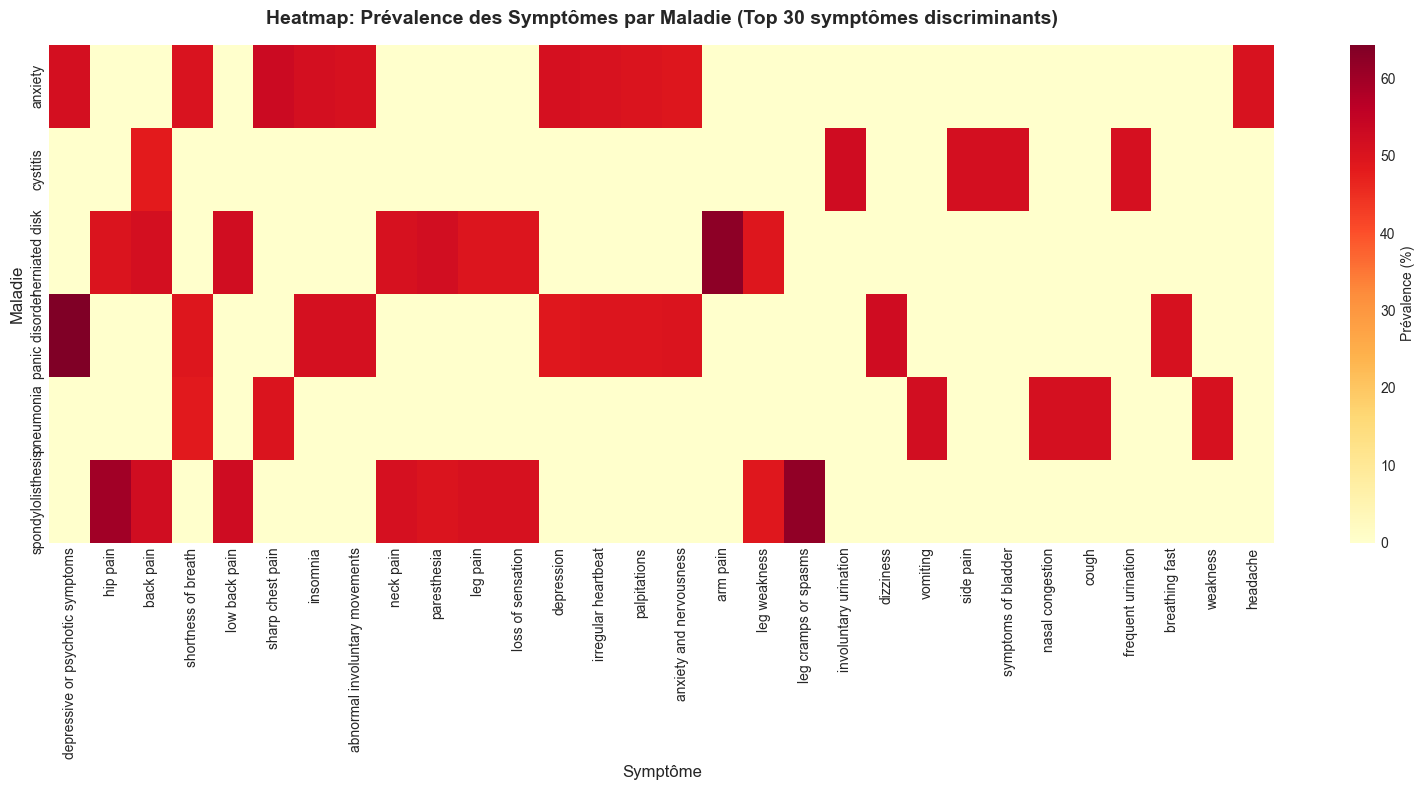

In [16]:
# Créer une heatmap symptômes vs maladies
disease_symptom_matrix = pd.DataFrame(index=DISEASES, columns=symptom_cols)

for disease in DISEASES:
    disease_data = df[df['diseases'] == disease]
    # Calculer le pourcentage de patients avec chaque symptôme
    prevalence = (disease_data[symptom_cols].sum() / len(disease_data)) * 100
    disease_symptom_matrix.loc[disease] = prevalence

disease_symptom_matrix = disease_symptom_matrix.astype(float)

# Sélectionner les symptômes les plus discriminants (variance élevée entre maladies)
symptom_variance = disease_symptom_matrix.var(axis=0).sort_values(ascending=False)
top_discriminant_symptoms = symptom_variance.head(30).index

# Visualiser
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(disease_symptom_matrix[top_discriminant_symptoms],
            cmap='YlOrRd',
            annot=False,
            fmt='.0f',
            cbar_kws={'label': 'Prévalence (%)'},
            ax=ax)

ax.set_title('Heatmap: Prévalence des Symptômes par Maladie (Top 30 symptômes discriminants)',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Symptôme', fontsize=12)
ax.set_ylabel('Maladie', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [17]:
# Identifier les symptômes discriminants
discriminant_symptoms = []

for symptom in symptom_cols:
    prevalences = disease_symptom_matrix[symptom]
    max_prevalence = prevalences.max()
    disease_with_max = prevalences.idxmax()

    # Si un symptôme a >50% de prévalence dans 1 maladie et <20% dans les autres
    if max_prevalence > 50:
        other_prevalences = prevalences[prevalences.index != disease_with_max]
        if other_prevalences.max() < 20:
            discriminant_symptoms.append({
                'symptom': symptom,
                'disease': disease_with_max,
                'prevalence': max_prevalence,
                'max_other': other_prevalences.max()
            })

discriminant_df = pd.DataFrame(discriminant_symptoms)

if len(discriminant_df) > 0:
    discriminant_df = discriminant_df.sort_values('prevalence', ascending=False)

    print(f"Symptômes discriminants identifiés: {len(discriminant_df)}")
    print("\nSymptômes fortement associés à une maladie spécifique:")
    print("=" * 80)
    for idx, row in discriminant_df.iterrows():
        print(f"{row['symptom']:30s} -> {row['disease']:20s} ({row['prevalence']:.1f}% vs {row['max_other']:.1f}% max autres)")
else:
    print("Aucun symptôme strictement discriminant trouvé")
    print("  (Les symptômes sont partagés entre plusieurs maladies)")

Symptômes discriminants identifiés: 19

Symptômes fortement associés à une maladie spécifique:
arm pain                       -> herniated disk       (62.3% vs 0.0% max autres)
leg cramps or spasms           -> spondylolisthesis    (61.9% vs 0.0% max autres)
involuntary urination          -> cystitis             (52.4% vs 0.0% max autres)
dizziness                      -> panic disorder       (52.3% vs 0.0% max autres)
vomiting                       -> pneumonia            (52.0% vs 0.0% max autres)
side pain                      -> cystitis             (51.7% vs 0.0% max autres)
symptoms of bladder            -> cystitis             (51.5% vs 0.0% max autres)
cough                          -> pneumonia            (51.5% vs 0.0% max autres)
nasal congestion               -> pneumonia            (51.5% vs 0.0% max autres)
frequent urination             -> cystitis             (51.2% vs 0.0% max autres)
breathing fast                 -> panic disorder       (51.0% vs 0.0% max autres)
wea

## Analyse de Co-occurrence de Symptômes

**Thinking:** Certains symptômes apparaissent souvent ensemble. Cette analyse peut révéler :
- Des patterns de symptômes qui co-existent
- Des syndromes ou groupes de symptômes liés
- Des insights pour le feature engineering (créer des features combinées)

**Méthode:** Pour chaque paire de symptômes, calculer combien de fois ils apparaissent ensemble.

In [18]:
# Calculer la co-occurrence de symptômes
cooccurrence_list = []

# Pour chaque paire de symptômes
for symptom1, symptom2 in combinations(symptom_cols, 2):
    # Compter combien de fois ils apparaissent ensemble (les deux = 1)
    both_present = ((df[symptom1] == 1) & (df[symptom2] == 1)).sum()

    # Calculer aussi la prévalence individuelle
    symptom1_count = df[symptom1].sum()
    symptom2_count = df[symptom2].sum()

    # Calculer le taux de co-occurrence
    if min(symptom1_count, symptom2_count) > 0:
        cooccurrence_rate = both_present / min(symptom1_count, symptom2_count)

        cooccurrence_list.append({
            'symptom_1': symptom1,
            'symptom_2': symptom2,
            'both_count': both_present,
            'symptom1_count': symptom1_count,
            'symptom2_count': symptom2_count,
            'cooccurrence_rate': cooccurrence_rate
        })

cooccurrence_df = pd.DataFrame(cooccurrence_list)
cooccurrence_df = cooccurrence_df.sort_values('both_count', ascending=False)

print(f"Co-occurrence calculée pour {len(cooccurrence_df):,} paires de symptômes")
print(f"\nTop {TOP_COOCCURRENCE} paires de symptômes co-occurrents:")
print("=" * 80)

for idx, row in cooccurrence_df.head(TOP_COOCCURRENCE).iterrows():
    print(f"{row['symptom_1']:25s} + {row['symptom_2']:25s}: "
          f"{row['both_count']:4d} co-occurrences "
          f"({row['cooccurrence_rate']*100:5.1f}% taux)")

Co-occurrence calculée pour 1,176 paires de symptômes

Top 20 paires de symptômes co-occurrents:
shortness of breath       + sharp chest pain         :  613 co-occurrences ( 49.3% taux)
depressive or psychotic symptoms + abnormal involuntary movements:  581 co-occurrences ( 56.6% taux)
depressive or psychotic symptoms + insomnia                 :  578 co-occurrences ( 55.8% taux)
depression                + depressive or psychotic symptoms:  574 co-occurrences ( 56.7% taux)
shortness of breath       + depressive or psychotic symptoms:  572 co-occurrences ( 50.2% taux)
depressive or psychotic symptoms + palpitations             :  568 co-occurrences ( 56.7% taux)
depressive or psychotic symptoms + irregular heartbeat      :  566 co-occurrences ( 56.2% taux)
anxiety and nervousness   + depressive or psychotic symptoms:  555 co-occurrences ( 55.7% taux)
insomnia                  + palpitations             :  526 co-occurrences ( 52.5% taux)
anxiety and nervousness   + insomnia            

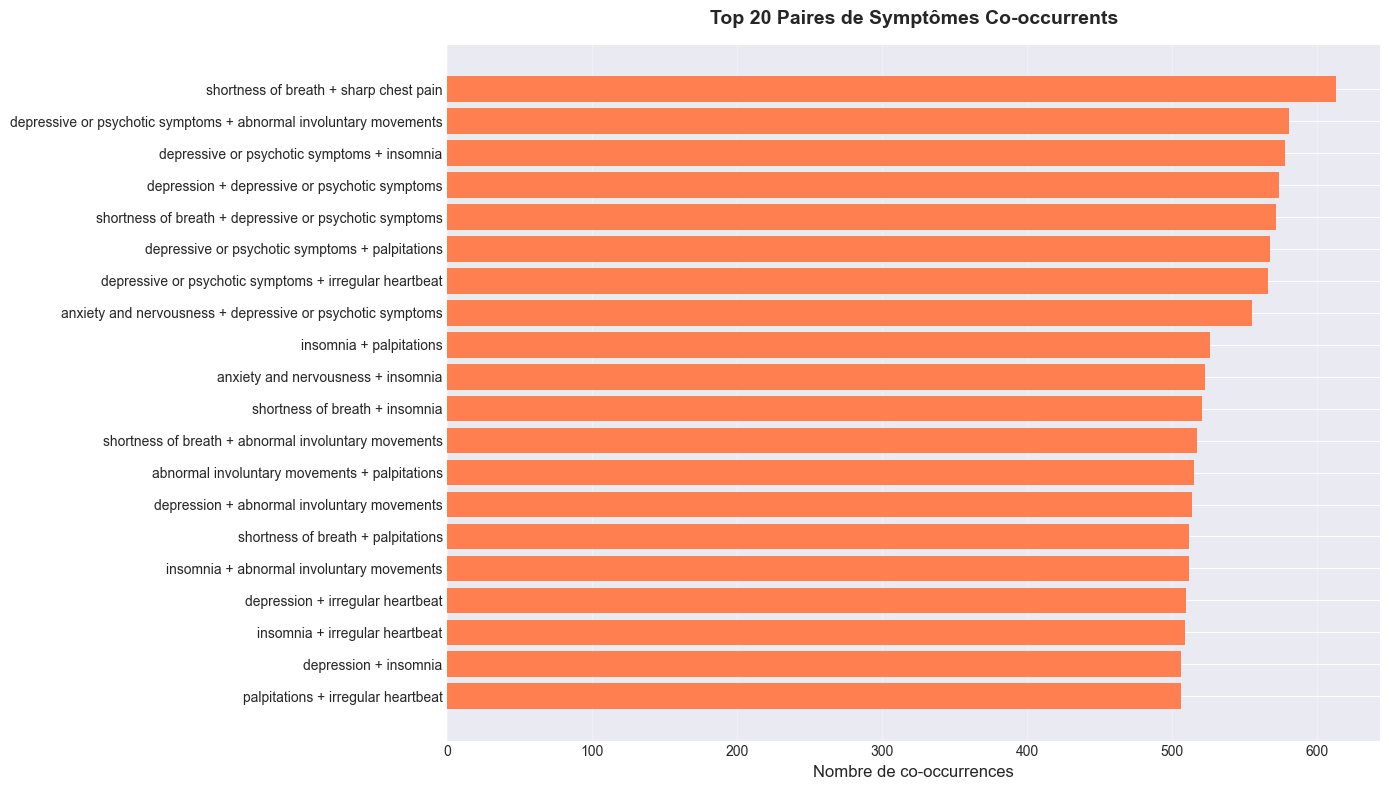

In [19]:
# Visualiser les top co-occurrences
top_cooccurrences = cooccurrence_df.head(TOP_COOCCURRENCE).copy()
top_cooccurrences['pair'] = (top_cooccurrences['symptom_1'] + ' + ' +
                              top_cooccurrences['symptom_2'])

fig, ax = plt.subplots(figsize=(14, 8))

ax.barh(range(len(top_cooccurrences)), top_cooccurrences['both_count'], color='coral')
ax.set_yticks(range(len(top_cooccurrences)))
ax.set_yticklabels(top_cooccurrences['pair'], fontsize=10)
ax.set_xlabel('Nombre de co-occurrences', fontsize=12)
ax.set_title(f'Top {TOP_COOCCURRENCE} Paires de Symptômes Co-occurrents',
             fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## Distribution du Nombre de Symptômes par Patient

**Objectif:** Comprendre combien de symptômes présente typiquement un patient pour chaque maladie

In [20]:
# Analyser la distribution du nombre de symptômes
symptoms_per_patient = df[symptom_cols].sum(axis=1)

print("Distribution globale du nombre de symptômes par patient:")
print("=" * 60)
print(f"  - Minimum: {symptoms_per_patient.min()}")
print(f"  - Maximum: {symptoms_per_patient.max()}")
print(f"  - Moyenne: {symptoms_per_patient.mean():.2f}")
print(f"  - Médiane: {symptoms_per_patient.median():.0f}")
print(f"  - Écart-type: {symptoms_per_patient.std():.2f}")
print(f"  - Q1 (25%): {symptoms_per_patient.quantile(0.25):.0f}")
print(f"  - Q3 (75%): {symptoms_per_patient.quantile(0.75):.0f}")

Distribution globale du nombre de symptômes par patient:
  - Minimum: 1
  - Maximum: 11
  - Moyenne: 5.86
  - Médiane: 6
  - Écart-type: 1.68
  - Q1 (25%): 5
  - Q3 (75%): 7


In [21]:
# Analyser par maladie
print("\nDistribution du nombre de symptômes par maladie:")
print("=" * 80)

for disease in DISEASES:
    disease_symptoms = df[df['diseases'] == disease][symptom_cols].sum(axis=1)
    print(f"\n{disease.upper()}:")
    print(f"  - Moyenne: {disease_symptoms.mean():.2f}")
    print(f"  - Médiane: {disease_symptoms.median():.0f}")
    print(f"  - Min-Max: {disease_symptoms.min()}-{disease_symptoms.max()}")
    print(f"  - Écart-type: {disease_symptoms.std():.2f}")


Distribution du nombre de symptômes par maladie:

ANXIETY:
  - Moyenne: 6.10
  - Médiane: 6
  - Min-Max: 1-11
  - Écart-type: 1.67

CYSTITIS:
  - Moyenne: 6.00
  - Médiane: 6
  - Min-Max: 2-11
  - Écart-type: 1.71

HERNIATED DISK:
  - Moyenne: 5.65
  - Médiane: 6
  - Min-Max: 1-11
  - Écart-type: 1.61

PANIC DISORDER:
  - Moyenne: 5.69
  - Médiane: 6
  - Min-Max: 1-11
  - Écart-type: 1.64

PNEUMONIA:
  - Moyenne: 6.01
  - Médiane: 6
  - Min-Max: 2-11
  - Écart-type: 1.72

SPONDYLOLISTHESIS:
  - Moyenne: 5.28
  - Médiane: 5
  - Min-Max: 2-9
  - Écart-type: 1.49


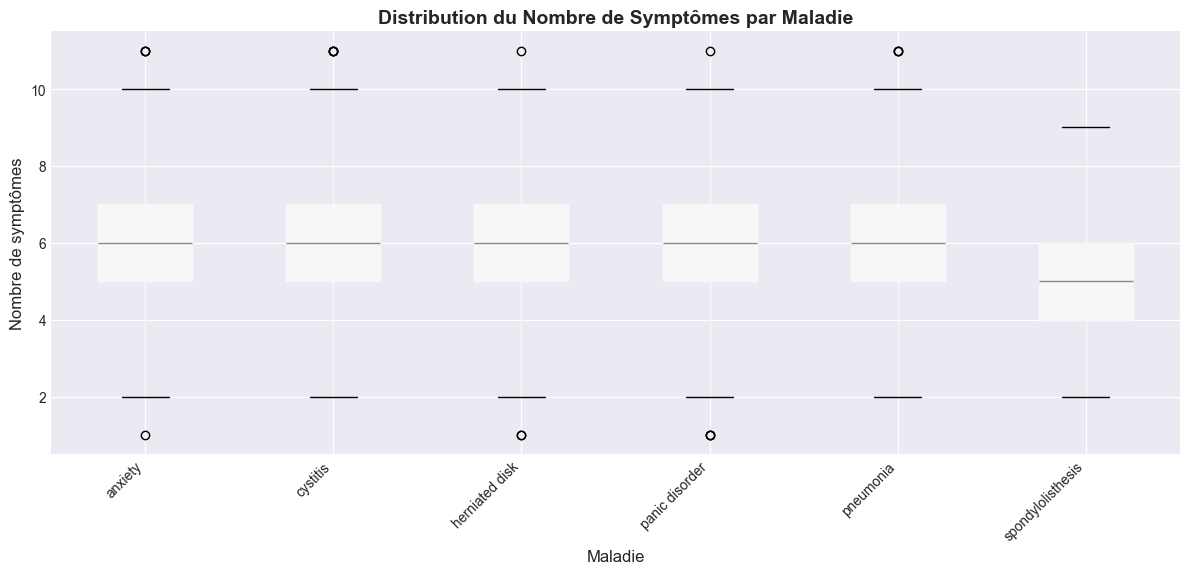

In [22]:
# Créer un DataFrame pour la visualisation
df_plot = df.copy()
df_plot['num_symptoms'] = df_plot[symptom_cols].sum(axis=1)

# Boxplot du nombre de symptômes par maladie
fig, ax = plt.subplots(figsize=(12, 6))

df_plot.boxplot(column='num_symptoms', by='diseases', ax=ax, patch_artist=True)

ax.set_title('Distribution du Nombre de Symptômes par Maladie',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Maladie', fontsize=12)
ax.set_ylabel('Nombre de symptômes', fontsize=12)
ax.set_xticklabels(DISEASES, rotation=45, ha='right')
plt.suptitle('')  # Enlever le titre automatique de pandas

plt.tight_layout()
plt.show()

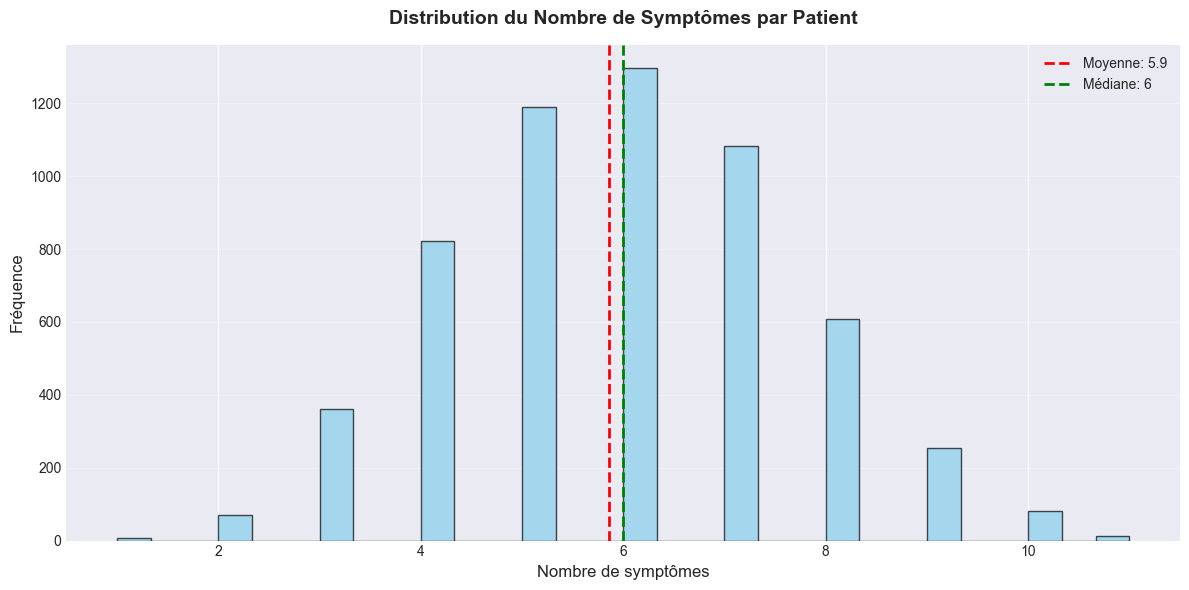

In [23]:
# Histogram de la distribution globale
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(symptoms_per_patient, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(symptoms_per_patient.mean(), color='red', linestyle='--',
           linewidth=2, label=f'Moyenne: {symptoms_per_patient.mean():.1f}')
ax.axvline(symptoms_per_patient.median(), color='green', linestyle='--',
           linewidth=2, label=f'Médiane: {symptoms_per_patient.median():.0f}')

ax.set_title('Distribution du Nombre de Symptômes par Patient',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Nombre de symptômes', fontsize=12)
ax.set_ylabel('Fréquence', fontsize=12)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusion de l'EDA

### Résumé des Insights

Cette analyse exploratoire du dataset nettoyé a révélé plusieurs informations importantes pour la modélisation Deep Learning.

#### Dataset

**Caractéristiques:**
- **Lignes:** 5,781 patients sans doublons
- **Colonnes:** 50 (49 symptômes + 1 maladie)
- **Classes:** 6 maladies bien définies
- **Équilibre:** Légèrement déséquilibré (ratio max/min: 2.37)
  - Plus fréquente: cystitis (1,219 cas)
  - Moins fréquente: spondylolisthesis (514 cas)

#### Symptômes

**Observations clés:**
- **Symptômes les plus fréquents:** 
  1. shortness of breath (1,593 occurrences, 27.6%)
  2. back pain (1,283 occurrences, 22.2%)
  3. sharp chest pain (1,243 occurrences, 21.5%)
- **Nombre moyen de symptômes par patient:** 5.86
- **Range:** 1-11 symptômes par patient
- **Médiane:** 6 symptômes

#### Corrélations

**Findings:**
- **Corrélations fortes identifiées:** 0 paires (seuil 0.7)
- **Symptômes redondants:** Aucun
- **Implications:** Excellente diversité des features, pas de redondance à éliminer

#### Symptômes Discriminants

**Points clés:**
- **Symptômes spécifiques à certaines maladies:** 19 symptômes discriminants identifiés
  - Exemples: arm pain -> herniated disk (62.3%), leg cramps -> spondylolisthesis (61.9%)
- **Overlap entre maladies:** Faible pour les symptômes discriminants, modéré pour les autres
- **Facilité de classification:** Bonne grâce aux symptômes discriminants

#### Co-occurrence

**Insights:**
- **Paires de symptômes fréquemment associées:**
  1. shortness of breath + sharp chest pain (613 co-occurrences, 49.3%)
  2. depressive or psychotic symptoms + abnormal involuntary movements (581, 56.6%)
  3. depressive or psychotic symptoms + insomnia (578, 55.8%)
- **Patterns intéressants:** Les symptômes psychologiques (depression, anxiety, insomnia) co-occurrent fortement

---

### Transformation pour Deep Learning

**Thinking:** Ce dataset sera transformé pour une approche NLP avec Bio_ClinicalBERT.

**Transformation prévue:**
- **Format actuel:** Colonnes binaires (0/1) pour chaque symptôme
- **Format cible:** Texte naturel décrivant les symptômes
- **Exemple:**
  - Avant: `back_pain=1, neck_pain=1, hip_pain=1, fatigue=0, ...`
  - Après: `"back pain, neck pain, hip pain"`

**Dataset final:**
- Colonne 1: `disease` (target)
- Colonne 2: `symptoms_text` (input pour BERT)

**Rationale:** Les modèles transformers comme Bio_ClinicalBERT sont optimisés pour comprendre le langage naturel et peuvent capturer des relations sémantiques entre symptômes que les approches ML classiques ne peuvent pas détecter.